In [8]:
import numpy as np
import pandas as pd
np.random.seed(0)
ts = pd.Series(np.random.randn(4), index=pd.date_range('2019-01-01', periods=4, freq='M'))
#시리즈 = 하나의 열
#인덱스로 이간인덱스를 주고있다.(datetimeindex)
print(type(ts))
print(ts.index)
print(ts.dtypes)
print(ts.describe())
ts

<class 'pandas.core.series.Series'>
DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30'], dtype='datetime64[ns]', freq='M')
float64
count    4.000000
mean     1.345960
std      0.817537
min      0.400157
25%      0.834093
50%      1.371395
75%      1.883263
max      2.240893
dtype: float64


2019-01-31    1.764052
2019-02-28    0.400157
2019-03-31    0.978738
2019-04-30    2.240893
Freq: M, dtype: float64

In [9]:
ts.shift(1) #하나씩 밀려져서 마지막꺼는 없어졌다.

2019-01-31         NaN
2019-02-28    1.764052
2019-03-31    0.400157
2019-04-30    0.978738
Freq: M, dtype: float64

In [10]:
ts.shift(-1)

2019-01-31    0.400157
2019-02-28    0.978738
2019-03-31    2.240893
2019-04-30         NaN
Freq: M, dtype: float64

In [11]:
ts.shift(1, freq='W') #일주일이 뒤로밀렸다.

2019-02-03    1.764052
2019-03-03    0.400157
2019-04-07    0.978738
2019-05-05    2.240893
Freq: WOM-1SUN, dtype: float64

In [12]:
ts = pd.Series(np.random.randn(100), index=pd.date_range('2019-3-1', periods=100, freq='D'))
ts.head(10)

2019-03-01    1.867558
2019-03-02   -0.977278
2019-03-03    0.950088
2019-03-04   -0.151357
2019-03-05   -0.103219
2019-03-06    0.410599
2019-03-07    0.144044
2019-03-08    1.454274
2019-03-09    0.761038
2019-03-10    0.121675
Freq: D, dtype: float64

In [15]:
ts.resample('W').mean() #weeks로 묶이게 된다.-> 객체가 된다.(zip, groupby와 같다. + 집계함수를 해주여야한다.)

2019-03-03    0.613456
2019-03-10    0.376722
2019-03-17   -0.146794
2019-03-24    0.207122
2019-03-31    0.045536
2019-04-07   -0.081312
2019-04-14   -0.398918
2019-04-21   -0.287513
2019-04-28   -0.353319
2019-05-05   -0.567629
2019-05-12   -0.055802
2019-05-19   -0.309877
2019-05-26    0.566217
2019-06-02    0.752381
2019-06-09    0.127201
Freq: W-SUN, dtype: float64

In [16]:
ts.resample('M').mean()

2019-03-31    0.168338
2019-04-30   -0.313210
2019-05-31    0.079016
2019-06-30    0.319947
Freq: M, dtype: float64

In [17]:
ts = pd.Series(np.random.randn(60),index=pd.date_range('2018-1-1', periods=60, freq='T')) #주기를 시간(분)으로
ts.head(10)

2018-01-01 00:00:00   -1.173123
2018-01-01 00:01:00    1.943621
2018-01-01 00:02:00   -0.413619
2018-01-01 00:03:00   -0.747455
2018-01-01 00:04:00    1.922942
2018-01-01 00:05:00    1.480515
2018-01-01 00:06:00    1.867559
2018-01-01 00:07:00    0.906045
2018-01-01 00:08:00   -0.861226
2018-01-01 00:09:00    1.910065
Freq: T, dtype: float64

In [19]:
ts.resample('10T').sum() #10분으로 그룹핑

2018-01-01 00:00:00    6.835324
2018-01-01 00:10:00    3.764630
2018-01-01 00:20:00    0.776495
2018-01-01 00:30:00   -0.538336
2018-01-01 00:40:00    1.828234
2018-01-01 00:50:00    0.167957
Freq: 10T, dtype: float64

In [22]:
ts.resample('5T').ohlc() #5분씩 묶일때 시작되는 놈, 고가, 저가, 종가
#resampleing 구간별로 시초가(개장가), 고가, 저가, 종가가 계산된다.

,open,high,low,close
2018-01-01 00:00:00,-1.173123,1.943621,-1.173123,1.922942
2018-01-01 00:05:00,1.480515,1.910065,-0.861226,1.910065
2018-01-01 00:10:00,-0.268003,0.947252,-0.268003,0.614079
2018-01-01 00:15:00,0.922207,1.326386,-1.099401,1.326386
2018-01-01 00:20:00,-0.694568,1.849264,-0.694568,0.672295
2018-01-01 00:25:00,0.407462,0.539249,-0.769916,0.031831
2018-01-01 00:30:00,-0.635846,0.676433,-0.635846,0.396007
2018-01-01 00:35:00,-1.093062,0.635031,-1.491258,0.635031
2018-01-01 00:40:00,2.383145,2.383145,-1.315907,-1.315907
2018-01-01 00:45:00,-0.461585,1.713343,-0.826439,-0.826439


In [28]:
ts.resample('30s').ffill().head(10) #채우는데 forward fill 데이터를 앞에있는놈으로 쪼개서 채운다.
ts.resample('30s').bfill().head(10) #backward fill

2018-01-01 00:00:00   -1.173123
2018-01-01 00:00:30    1.943621
2018-01-01 00:01:00    1.943621
2018-01-01 00:01:30   -0.413619
2018-01-01 00:02:00   -0.413619
2018-01-01 00:02:30   -0.747455
2018-01-01 00:03:00   -0.747455
2018-01-01 00:03:30    1.922942
2018-01-01 00:04:00    1.922942
2018-01-01 00:04:30    1.480515
Freq: 30S, dtype: float64

In [32]:
import pandas_datareader.data as web
gs = web.DataReader('078930.KS', 'yahoo', '2014-01-01', '2016-03-06')
gs.head(10) #주식시장 데이터 볼륨=거래량, 시간외종가=adjcolse

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,58300.0,56000.0,58200.0,56400.0,247497.0,48250.261719
2014-01-03,56700.0,55100.0,56500.0,55700.0,220482.0,47651.410156
2014-01-06,55800.0,54600.0,55400.0,55500.0,190935.0,47480.308594
2014-01-07,55600.0,54900.0,55000.0,55100.0,179610.0,47138.109375
2014-01-08,55400.0,53700.0,55300.0,54300.0,374566.0,46453.707031
2014-01-09,54400.0,53600.0,54200.0,54000.0,264952.0,46197.054688
2014-01-10,54500.0,53000.0,54000.0,53300.0,652681.0,45598.207031
2014-01-13,53800.0,53200.0,53300.0,53400.0,165177.0,45683.757812
2014-01-14,53400.0,52500.0,53000.0,53000.0,186179.0,45341.558594


In [33]:
ma5 = gs['Adj Close'].rolling(window=5).mean() #해당행까지의 평균이기 때문에 5행부터 출력이 가능하다.
ma5.head(10)

Date
2014-01-02             NaN
2014-01-03             NaN
2014-01-06             NaN
2014-01-07             NaN
2014-01-08    47394.759375
2014-01-09    46984.117969
2014-01-10    46573.477344
2014-01-13    46214.167188
2014-01-14    45854.857031
2014-01-15    45666.647656
Name: Adj Close, dtype: float64

In [36]:
new_gs = gs[gs['Volume']!=0]
ma20 = new_gs['Adj Close'].rolling(window=20).mean()
ma60 = new_gs['Adj Close'].rolling(window=60).mean()
ma120 = new_gs['Adj Close'].rolling(window=120).mean()
new_gs.insert(len(new_gs.columns),'MA20', ma20)
new_gs.insert(len(new_gs.columns),'MA60', ma60)
new_gs.insert(len(new_gs.columns),'MA120', ma120)
new_gs.tail()

,High,Low,Open,Close,Volume,Adj Close,MA20,MA60,MA120
Date,,,,,,,,,
2016-02-26,54500.0,53200.0,54300.0,53300.0,159453.0,48372.046875,46305.118945,45054.610547,43932.832487
2016-02-29,53900.0,52800.0,53000.0,53000.0,154692.0,48099.785156,46516.122852,45095.671159,43995.944792
2016-03-02,55200.0,53500.0,53900.0,55100.0,229999.0,50005.625000,46779.310352,45187.584245,44077.875749
2016-03-03,55800.0,54300.0,55300.0,55000.0,217063.0,49914.867188,46988.044922,45260.364518,44160.518750
2016-03-04,54800.0,53200.0,54700.0,54200.0,237934.0,49188.835938,47124.176172,45328.386003,44242.250684


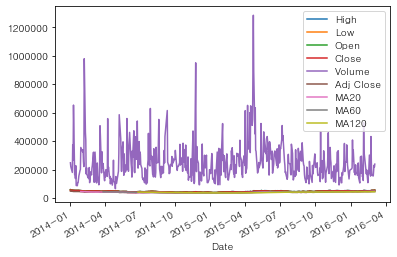

In [37]:
new_gs.plot()

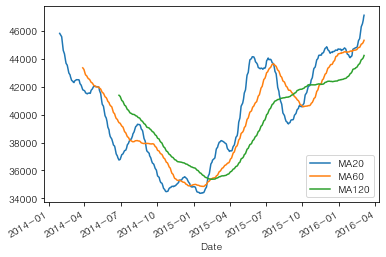

In [39]:
new_gs[["MA20","MA60","MA120"]].plot()

In [42]:
#텍스트 마이닝 (뉴스 기사 수집/분석)
goog = web.DataReader('GOOG', 'yahoo', start='2010', end='2020')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,311.532288,308.832428,311.208527,308.832428,2448700.0,308.832428
2010-01-04,313.579620,310.954468,312.304413,312.204773,3927000.0,312.204773
2010-01-05,312.747742,309.609497,312.418976,310.829926,6031900.0,310.829926
2010-01-06,311.761444,302.047852,311.761444,302.994293,7987100.0,302.994293
2010-01-07,303.861053,295.218445,303.562164,295.940735,12876600.0,295.940735


In [43]:
goog.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,1350.260010,1342.780029,1348.500000,1343.560059,347500.0,1343.560059
2019-12-26,1361.327026,1344.469971,1346.170044,1360.400024,667500.0,1360.400024
2019-12-27,1364.530029,1349.310059,1362.989990,1351.890015,1038400.0,1351.890015
2019-12-30,1353.000000,1334.020020,1350.000000,1336.140015,1050900.0,1336.140015
2019-12-31,1338.000000,1329.084961,1330.109985,1337.020020,961800.0,1337.020020


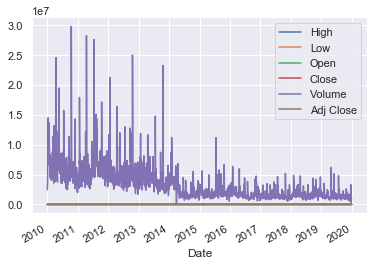

In [44]:
import seaborn 
seaborn.set()
goog.plot()

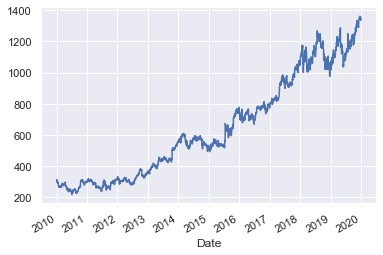

In [45]:
goog['Close'].plot()

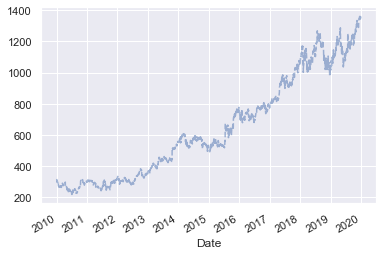

In [49]:
goog['Close'].plot(alpha=0.5, style='--') #투명도 조절

In [51]:
import FinanceDataReader as fdr
hynix = fdr.DataReader('000660','2014-01-01','2020-07-24')
hynix.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-07-20,82800,83000,82100,82200,2008624,-0.008444
2020-07-21,83400,84700,83000,84100,4181015,0.023114
2020-07-22,84100,84200,82900,83200,2876295,-0.010702
2020-07-23,84000,84000,82300,82400,3591647,-0.009615
2020-07-24,82300,83200,82200,82800,1526933,0.004854


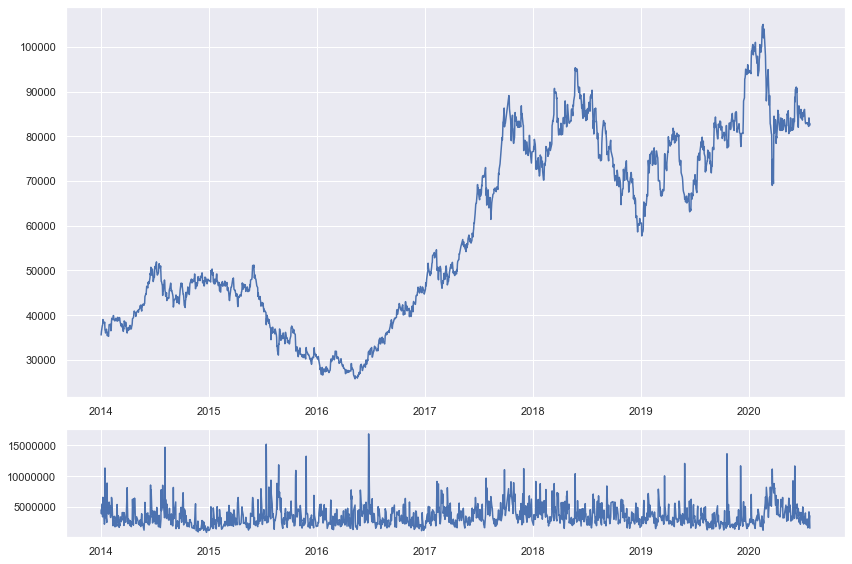

In [57]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
top_axes = plt.subplot2grid((4,4),(0,0),rowspan=3,colspan=4) #subplot2grid 덕분에 가상의선으로 4행4열로 분할하여 사용가능
#0,0 분할된 화면에 시작지점 rowspan colspan 합친다.(화면을 병합) 3*4를 하나로 합침
bottom_axes = plt.subplot2grid((4,4),(3,0),rowspan=1,colspan=4) #화면을 다시 병합하여 2:1로 분할된 화면이 된다.
bottom_axes.get_yaxis().get_major_formatter().set_scientific(False)
top_axes.plot(hynix.index,hynix['Close'],label='Adjust Close') #2개의 plot출력
bottom_axes.plot(hynix.index, hynix['Volume'])
plt.tight_layout()
plt.show()

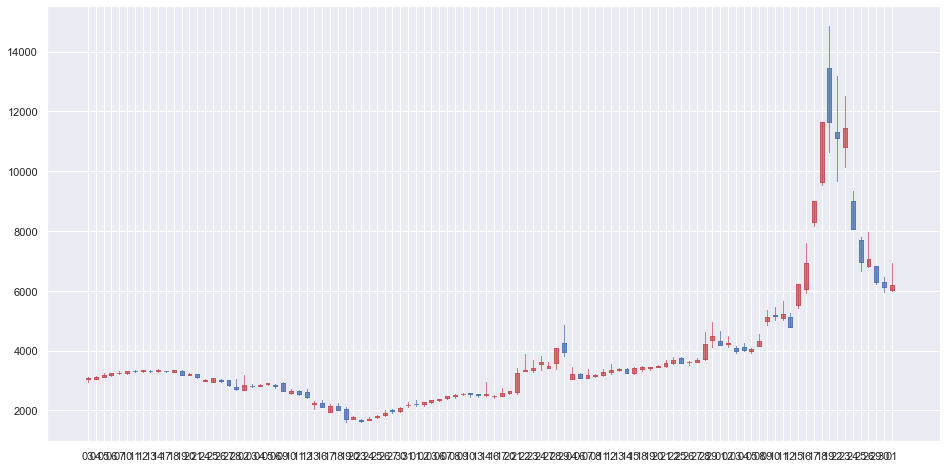

In [65]:
import matplotlib.ticker as ticker
import mpl_finance as matfin
import datetime

start = datetime.datetime(2020,2,1)
end = datetime.datetime(2020,7,1)
hynix = fdr.DataReader('065450', start, end)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
day_list = range(len(hynix))
name_list = []
for day in hynix.index:
    name_list.append(day.strftime('%d'))
ax.xaxis.set_major_locator(ticker.FixedLocator(day_list))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list))

matfin.candlestick2_ohlc(ax, hynix['Open'], hynix['High'], hynix['Low'], hynix['Close'], width=0.5, colorup='r', colordown='b')
plt.show()

In [ ]:
import pymysql
import numpy
import pandas as pd
conn = pymysql.connect(host='0', port=3306, user='root', passwd='10042356', db='sungjuk_test', charset='utf8mb4', 
                      cursorclass=pymysql.cursors.DictCursor)
cursor = conn.cursor
cursor.execute("""select * from student""")
rez = cursor.fetchall()
print(type(rez))
df = pd.DataFrame(rez)
print(df.describe())
print(df.dtypes)
print(df.shaepe)
#성적 데이터를 로딩한 다음
#입력시 반을 3가지로 입력하고 반별 groupby해서 출력하시오.
#평균이 80점 이상인 사람과 이하인 사람을 카운트한 교차분석표 작성

In [98]:
#성적 데이터를 로딩한 다음
#입력시 반을 3가지로 입력하고 반별 groupby해서 출력하시오.
#평균이 80점 이상인 사람과 이하인 사람을 카운트한 교차분석표 작성
import pymysql
import numpy
import pandas as pd
conn = pymysql.connect(host='127.0.0.1', port=3306, user='root', 
                       password='10042356', use_unicode=True, db="sungjuk_test", charset='utf8', autocommit=True)
cursor = conn.cursor()
cursor.execute("""select * from student2""")
rez = cursor.fetchall()
df = pd.DataFrame(rez, columns=['반','번호','이름','국어','영어','수학','총점','평균'])
print(df.groupby('반')['이름'].count()) #반별 학생수
pd.crosstab(df['반'],df['평균']>=80) #반별 평균 80점 이상(true) 80점 이하(false)의 학생수

반
1    2
2    3
3    3
Name: 이름, dtype: int64


평균,False,True
반,,
1,0,2
2,3,0
3,1,2


C:\Users\gram\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


['Noise - Street/Sidewalk' 'Illegal Parking' 'Noise - Commercial'
 'Noise - Vehicle' 'Rodent' 'Blocked Driveway' 'Noise - House of Worship'
 'Street Light Condition' 'Harboring Bees/Wasps' 'Taxi Complaint'
 'Homeless Encampment' 'Traffic Signal Condition' 'Food Establishment'
 'Noise - Park' 'Broken Muni Meter' 'Benefit Card Replacement'
 'Sanitation Condition' 'ELECTRIC' 'PLUMBING' 'HEATING'
 'GENERAL CONSTRUCTION' 'Street Condition' 'Consumer Complaint'
 'Derelict Vehicles' 'Noise' 'Drinking' 'Indoor Air Quality' 'Panhandling'
 'Derelict Vehicle' 'Lead' 'Water System' 'Noise - Helicopter'
 'Homeless Person Assistance' 'Root/Sewer/Sidewalk Condition'
 'Sidewalk Condition' 'Graffiti' 'DOF Literature Request'
 'Animal in a Park' 'Overgrown Tree/Branches' 'Air Quality'
 'Dirty Conditions' 'Water Quality' 'Other Enforcement'
 'Collection Truck Noise' 'Illegal Tree Damage' 'Litter Basket / Request'
 'Violation of Park Rules' 'Maintenance or Facility' 'Sewer'
 'Agency Issues' 'Beach/Pool/Sa

City
ARVERNE        21
ASTORIA       676
Arverne       123
Astoria       892
BAYSIDE       189
             ... 
WOODHAVEN     173
WOODSIDE      304
Whitestone    158
Woodhaven     291
Woodside      305
Name: Complaint Type, Length: 142, dtype: int64

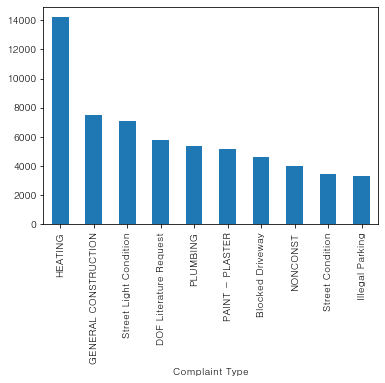

In [2]:
#문제 : service.csv 를 로딩한 다음
# 불평의 종류(Complaint Type)와 불평의 종류별 개수를 출력하시오
# 불평의 상위10개를 출력하시오
# 불평의 상위 10개를 barplot하여 그래프로 출력하시오
#거주지별 불평의 개수를 확인하시오
#거주지와 불평의 cross_table을 생성하여 출력하고 불평과 거주지별 도수분포표를 출력하시오
#불평의 종류별로 따로 그룹핑한 다음 카운트 하시오

#소음 불평(길위에서의 소음)이 많은 지역을 확인하시요.
#소음불평이 전체 불평에서 차지하는 비율을 출력하시오

import pandas as pd
df = pd.read_csv("services.csv")
print(df['Complaint Type'].unique()) #불평의 종류
print(len(df['Complaint Type'].unique())) #불평의 개수
df.groupby('Complaint Type').count() #불평으로 그룹핑 후 카운트
df.groupby('Complaint Type')['Unique Key'].count().sort_values(ascending=False).head(10) #불평의 상위10개 출력
df.groupby('Complaint Type')['Unique Key'].count().sort_values(ascending=False).head(10).plot(kind='bar') #barplot
pd.crosstab(df['Complaint Type'],df['City']) #도수분포표
df.groupby('City')['Complaint Type'].count()  #거주지별 불평의 갯수

In [3]:
df.groupby([df['Complaint Type'],df['Incident Address']]).count()

Unique Key  Created Date  \
Complaint Type          Incident Address                                  
APPLIANCE               1 MARBLE HILL AVENUE            1             1   
                        100-14 93 AVENUE                1             1   
                        102-28 RUSSELL STREET           2             2   
                        1045 STRATFORD AVENUE           1             1   
                        105 EAST 177 STREET             2             2   
...                                                   ...           ...   
Water System            WINSOR PLACE                    1             1   
                        WOOLLEY AVENUE                  1             1   
Window Guard            300 EAST 96 STREET              1             1   
                        49 BOKEE COURT                  1             1   
X-Ray Machine/Equipment 25-10 30 AVENUE                 1             1   

                                               Closed Date  Agency  \
Complaint Type          Incident Address                             
APPLIANCE               1 MARBLE HILL AVENUE             0       1   
                        100-14 93 AVENUE                 0       1   
                        102-28 RUSSELL STREET            0       2   
                        1045 STRATFORD AVENUE            0       1   
                        105 EAST 177 STREET              0       2   
...                                                    ...     ...   
Water System            WINSOR PLACE                     1       1   
                        WOOLLEY AVENUE                   1       1   
Window Guard            300 EAST 96 STREET               0       1   
                        49 BOKEE COURT                   0       1   
X-Ray Machine/Equipment 25-10 30 AVENUE                  1       1   

                                               Agency Name  Descriptor  \
Complaint Type          Incident Address                                 
APPLIANCE               1 MARBLE HILL AVENUE             1           1   
                        100-14 93 AVENUE                 1           1   
                        102-28 RUSSELL STREET            2           2   
                        1045 STRATFORD AVENUE            1           1   
                        105 EAST 177 STREET              2           2   
...                                                    ...         ...   
Water System            WINSOR PLACE                     1           1   
                        WOOLLEY AVENUE                   1           1   
Window Guard            300 EAST 96 STREET               1           1   
                        49 BOKEE COURT                   1           1   
X-Ray Machine/Equipment 25-10 30 AVENUE                  1           1   

                                               Location Type  Incident Zip  \
Complaint Type          Incident Address                                     
APPLIANCE               1 MARBLE HILL AVENUE               1             1   
                        100-14 93 AVENUE                   1             1   
                        102-28 RUSSELL STREET              2             2   
                        1045 STRATFORD AVENUE              1             1   
                        105 EAST 177 STREET                2             2   
...                                                      ...           ...   
Water System            WINSOR PLACE                       0             1   
                        WOOLLEY AVENUE                     0             1   
Window Guard            300 EAST 96 STREET                 1             1   
                        49 BOKEE COURT                     1             1   
X-Ray Machine/Equipment 25-10 30 AVENUE                    1             1   

                                               Street Name  Cross Street 1  \
Complaint Type          Incident Address                                     
APPLIANCE               1 

In [4]:
pd.crosstab(df['Complaint Type'],df['City'])

City,ARVERNE,ASTORIA,Arverne,Astoria,BAYSIDE,BELLEROSE,BELLEVILLE,BIRMINGHAM,BLOOMIGTON,BOHIEMA,...,UNION CITY,VALLEY STREAM,WEST NEW YORK,WHITESTONE,WOODBURY,WOODHAVEN,WOODSIDE,Whitestone,Woodhaven,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,
APPLIANCE,0,0,0,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
Adopt-A-Basket,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Air Quality,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,5
Animal Abuse,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Animal Facility - No Permit,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Water Conservation,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2
Water Quality,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Water System,0,0,2,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,13,6,11


In [40]:
#소음 불평(길위에서의 소음)이 많은 지역을 확인하시요.
#소음불평이 전체 불평에서 차지하는 비율을 출력하시오
df_new = df[df['Complaint Type'] == 'Noise - Street/Sidewalk']
df_new.groupby('City')['Complaint Type'].count().sort_values(ascending=False).head(1)

City
NEW YORK    902
Name: Complaint Type, dtype: int64

In [6]:
df.groupby('City')['Complaint Type'].count()  #거주지별 불평의 갯수

City
ARVERNE        21
ASTORIA       676
Arverne       123
Astoria       892
BAYSIDE       189
             ... 
WOODHAVEN     173
WOODSIDE      304
Whitestone    158
Woodhaven     291
Woodside      305
Name: Complaint Type, Length: 142, dtype: int64

In [7]:
# 2 불평의 상위 10개를 출력하시오
df['Complaint Type'].value_counts().head(10)

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint Type, dtype: int64

In [38]:
df[df['Complaint Type'].str.contains('Noise')].count()/df['Complaint Type'].count()

Unique Key                        0.080509
Created Date                      0.080509
Closed Date                       0.055659
Agency                            0.080509
Agency Name                       0.080509
Complaint Type                    0.080509
Descriptor                        0.080509
Location Type                     0.050608
Incident Zip                      0.080382
Incident Address                  0.062565
Street Name                       0.062565
Cross Street 1                    0.059332
Cross Street 2                    0.059305
Intersection Street 1             0.017809
Intersection Street 2             0.017809
Address Type                      0.080445
City                              0.080436
Landmark                          0.000126
Facility Type                     0.049708
Status                            0.080509
Due Date                          0.050536
Resolution Action Updated Date    0.055767
Community Board                   0.080509
Borough    